<a href="https://colab.research.google.com/github/arghac14/ComparativeAnalysis-and-Prediction-of-CropProductions/blob/master/Predictions/Ajmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [64]:
from google.colab import files
uploaded = files.upload()

Saving Ajmer.xlsx to Ajmer.xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Ajmer.xlsx']))

In [0]:
df.columns = [''] * len(df.columns)
df.columns = ['Year', 'Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','TGM(Tonnes)','Irrigated_area(hec)','Yield']

In [77]:
df

,Year,Rainfall(mm),Area(hec),Seed_distribution,SRR%,Fertilizer_consumption(kg/hec),TGM(Tonnes),Irrigated_area(hec),Yield
0,2007-08,420.8,22000,6270,28.50,71.40,14,21457,3336
1,2008-09,670.1,17000,4257,24.98,71.00,19,16039,2761
2,2009-10,224.0,62000,5500,45.80,20.20,6,58681,2113
3,2010-11,685.2,64332,11944,18.57,42.10,17,57062,3238
4,2011-12,585.3,46550,6568,14.10,44.30,10,44336,3317
5,2012-13,602.7,66027,10733,16.40,57.20,12,64229,3152
6,2013-14,565.0,56000,10997,19.64,27.44,11,54533,3232
7,2014-15,584.1,56000,10997,19.64,45.87,10,60954,2472
8,2015-16,389.9,42294,7896,18.49,46.70,10,41786,2256
9,2016-17,652.1,55466,14415,25.99,44.48,9,54402,2390


## Showing correlation between dependent and independent variables

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

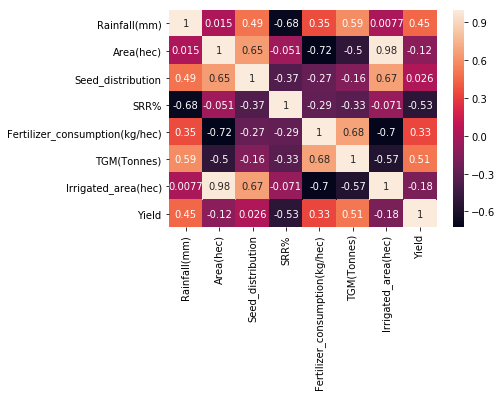

In [79]:
sb.heatmap(df.corr(),annot=True)

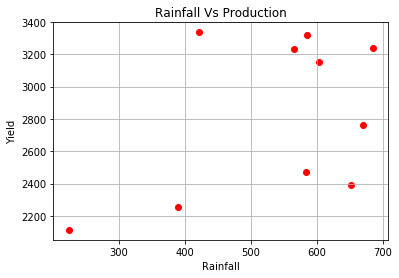

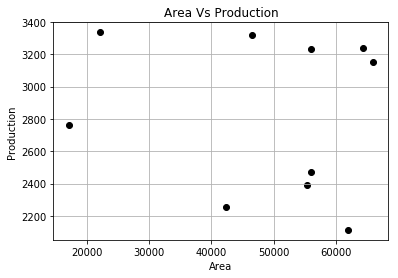

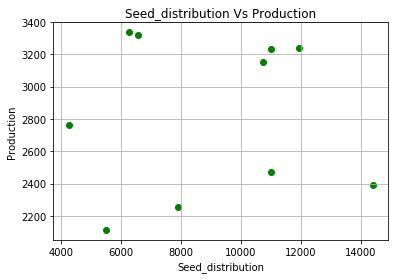

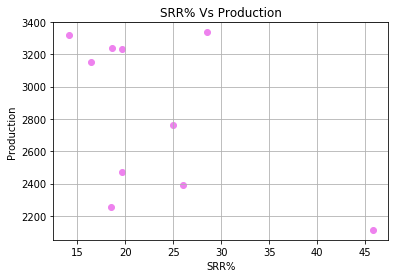

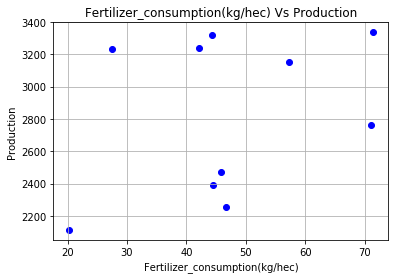

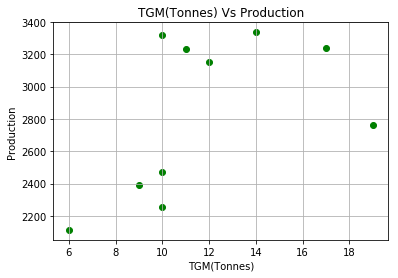

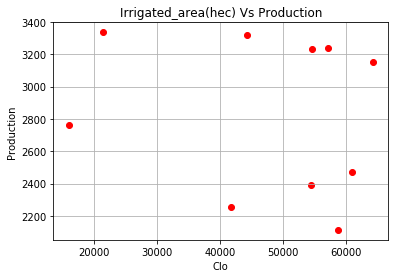

In [80]:
plt.scatter(df['Rainfall(mm)'],df['Yield'],color='red')
plt.title("Rainfall Vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.grid()
plt.show()
plt.scatter(df['Area(hec)'],df['Yield'],color='black')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

plt.scatter(df['Seed_distribution'],df['Yield'],color='green')
plt.title("Seed_distribution Vs Production")
plt.xlabel("Seed_distribution")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['SRR%'],df['Yield'],color='violet')
plt.title("SRR% Vs Production")
plt.xlabel("SRR%")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Fertilizer_consumption(kg/hec)'],df['Yield'],color='blue')
plt.title("Fertilizer_consumption(kg/hec) Vs Production")
plt.xlabel("Fertilizer_consumption(kg/hec)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['TGM(Tonnes)'],df['Yield'],color='green')
plt.title("TGM(Tonnes) Vs Production")
plt.xlabel("TGM(Tonnes)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Irrigated_area(hec)'],df['Yield'],color='red')
plt.title("Irrigated_area(hec) Vs Production")
plt.xlabel("Clo")
plt.ylabel("Production")
plt.grid()
plt.show()


## Multivariate Linear Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [82]:
X = df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']] 
Y = df['Yield']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')



Predicted Production: [26278.78137583  1094.26799429] 


Coefficients:  [ 2.13443123e-01  2.81610524e-01 -1.35218777e+00  5.20313973e+02
 -4.71984274e+01 -1.68979578e-02] 


R-squared score:  -15264.777240290776 




## Regression (Predicting Production for each District without taking that District as training data) :


In [83]:
error=[]
n=len(df['Yield'])
for i in range(n):
  A_test=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].iloc[df.index==i]
  b_test=df.iloc[df.index==i]['Yield']
  A_train=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].drop([i],axis=0)
  b_train=df.drop([i])['Yield']

  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  print('~ District:',df.at[i,'Year'],'-\n','Predicted Production:',b_pred,', ','Actual Production:',[df.loc[i,'Yield']],', ','Error: ',b_pred-df.loc[i,'Yield'])
  error.append(float(b_pred-df.loc[i,'Yield']))
  

~ District: 2007-08 -
 Predicted Production: [1611.85498021] ,  Actual Production: [3336] ,  Error:  [-1724.14501979]
~ District: 2008-09 -
 Predicted Production: [4466.49896891] ,  Actual Production: [2761] ,  Error:  [1705.49896891]
~ District: 2009-10 -
 Predicted Production: [16532.59672328] ,  Actual Production: [2113] ,  Error:  [14419.59672328]
~ District: 2010-11 -
 Predicted Production: [3377.96826944] ,  Actual Production: [3238] ,  Error:  [139.96826944]
~ District: 2011-12 -
 Predicted Production: [3010.16998171] ,  Actual Production: [3317] ,  Error:  [-306.83001829]
~ District: 2012-13 -
 Predicted Production: [2831.41327966] ,  Actual Production: [3152] ,  Error:  [-320.58672034]
~ District: 2013-14 -
 Predicted Production: [2298.61048675] ,  Actual Production: [3232] ,  Error:  [-933.38951325]
~ District: 2014-15 -
 Predicted Production: [2410.48175732] ,  Actual Production: [2472] ,  Error:  [-61.51824268]
~ District: 2015-16 -
 Predicted Production: [3846.10505453] , 

**Mean Squared Error:**

In [84]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error/(n))

print("\nMean Squared Error: ",mean_squared_error)

[-1724.1450197895379, 1705.4989689062768, 14419.59672328423, 139.96826943861288, -306.8300182861017, -320.58672033726543, -933.3895132468188, -61.51824268398286, 1590.1050545254702, 759.4947624217475]

Mean Squared Error:  4669.078612771239
